In [7]:
%matplotlib inline

In [1]:
import pandas as pd
import plotly as pl
import ipywidgets as widgets
from ipywidgets import interact, interactive

from common import *

In [2]:
df = pd.read_csv(f'{get_root()}/data/data.csv', index_col=0)
df.head()

,date,day,month,year,cases,deaths,country,geoId,population,tot_deaths,tot_cases
0,2020-04-12,12,4,2020,34,3,Afghanistan,AF,37172386.0,18,555
1,2020-04-11,11,4,2020,37,0,Afghanistan,AF,37172386.0,15,521
2,2020-04-10,10,4,2020,61,1,Afghanistan,AF,37172386.0,15,484
3,2020-04-09,9,4,2020,56,3,Afghanistan,AF,37172386.0,14,423
4,2020-04-08,8,4,2020,30,4,Afghanistan,AF,37172386.0,11,367


### New cases in time

* Ability to select date period for the graph

In [5]:
min_date = df['date'].min()
max_date = df['date'].max()

min_date, max_date

('2019-12-31', '2020-04-12')

In [4]:
widgets.FloatRangeSlider(min=min_date, max=max_date)

TypeError: can't multiply sequence by non-int of type 'float'

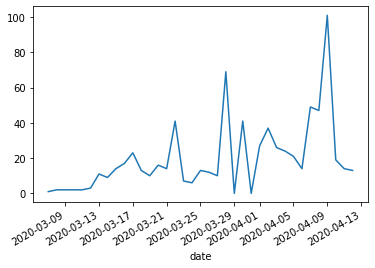

In [13]:
def f(country, min_date, max_date):
    d = df
    d = d[d['country'] == country]
    d = d[(d['date'] >= min_date) | (d['date'] < max_date)]
    
#     print(d)

    d['date'] = pd.to_datetime(d['date'])
    
    d.set_index('date')['cases'].plot()
    
f('Slovakia', '2020-03-25', '2020-04-10')

In [ ]:
slider = widgets.FloatRangeSlider

interact(f, );

widgets.